## Problem Statements:

#### Prepare a model for glass classification using KNN

In [1]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd
from sklearn.model_selection import GridSearchCV,train_test_split
import imblearn
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

import warnings 
warnings.filterwarnings("ignore")

In [2]:
glass=pd.read_csv(r'E:\DS Assigment\KNN/glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
## checking the null values 
glass.isnull().any()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

In [4]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
## appling basic exploration info and describe 
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
#Checking duplicate value
glass.duplicated().any()

True

In [8]:
glass.drop_duplicates(inplace=True)

In [9]:
glass.duplicated().sum()

0

In [10]:
glass["Type"].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

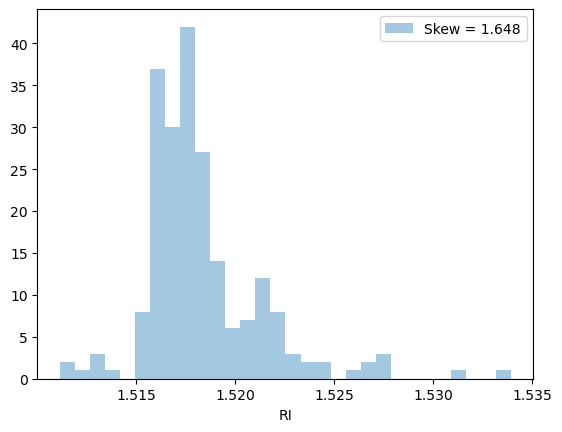

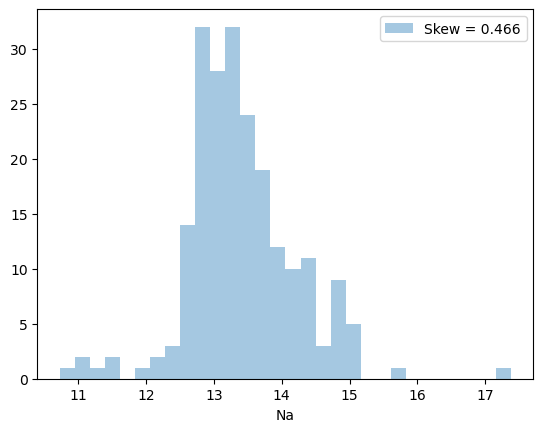

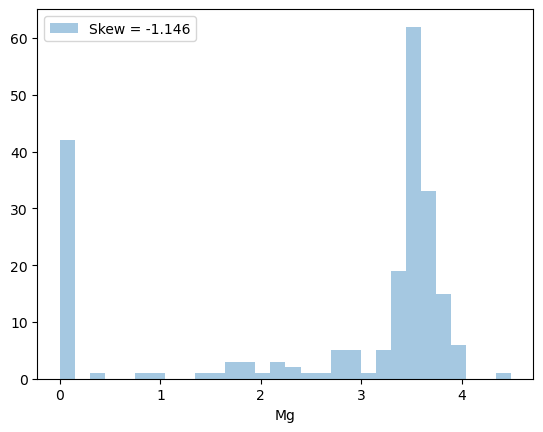

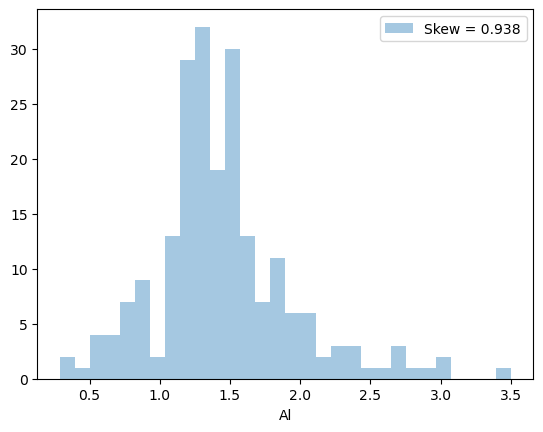

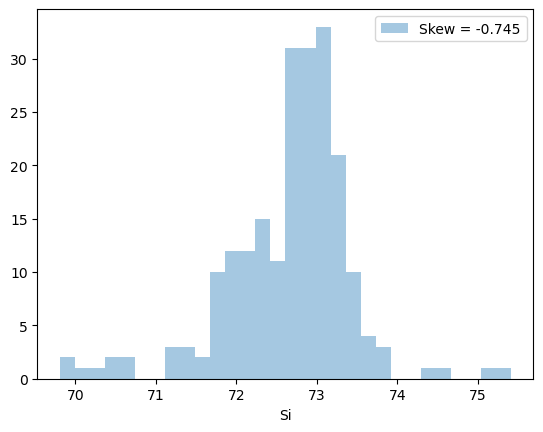

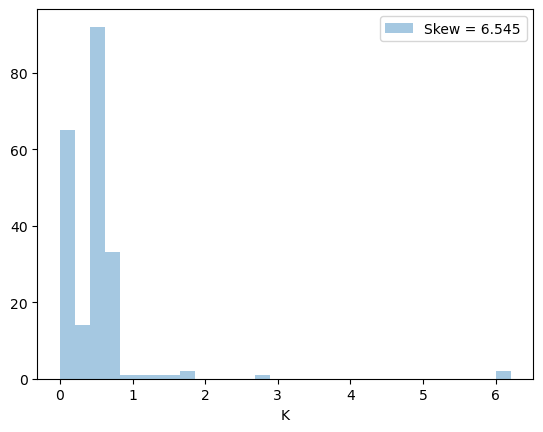

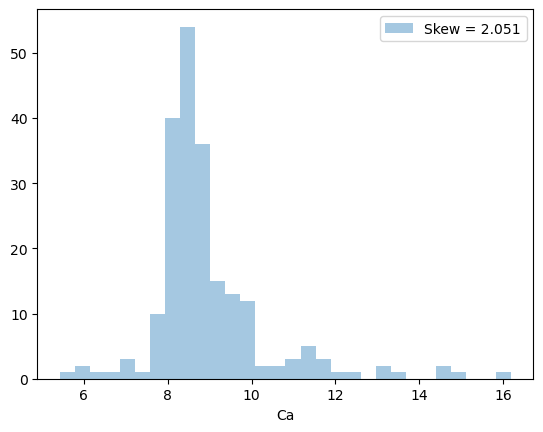

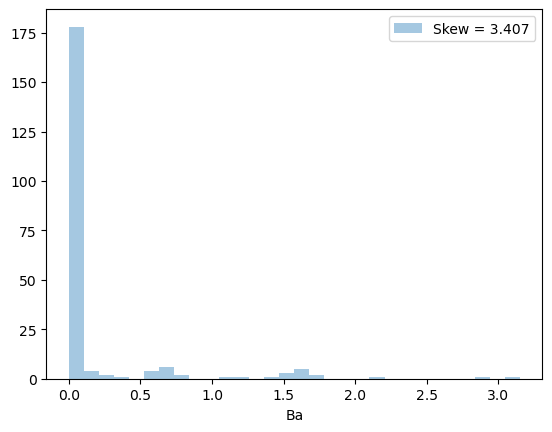

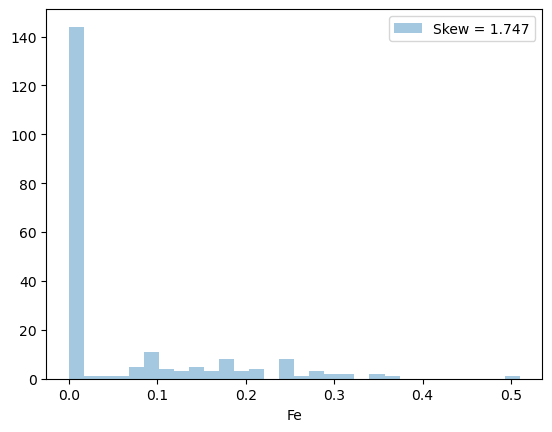

In [11]:
## Data Visualization
features = glass.columns[:-1].tolist()
for feat in features:
    skew = glass[feat].skew()
    sns.distplot(glass[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [12]:
list(glass)

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

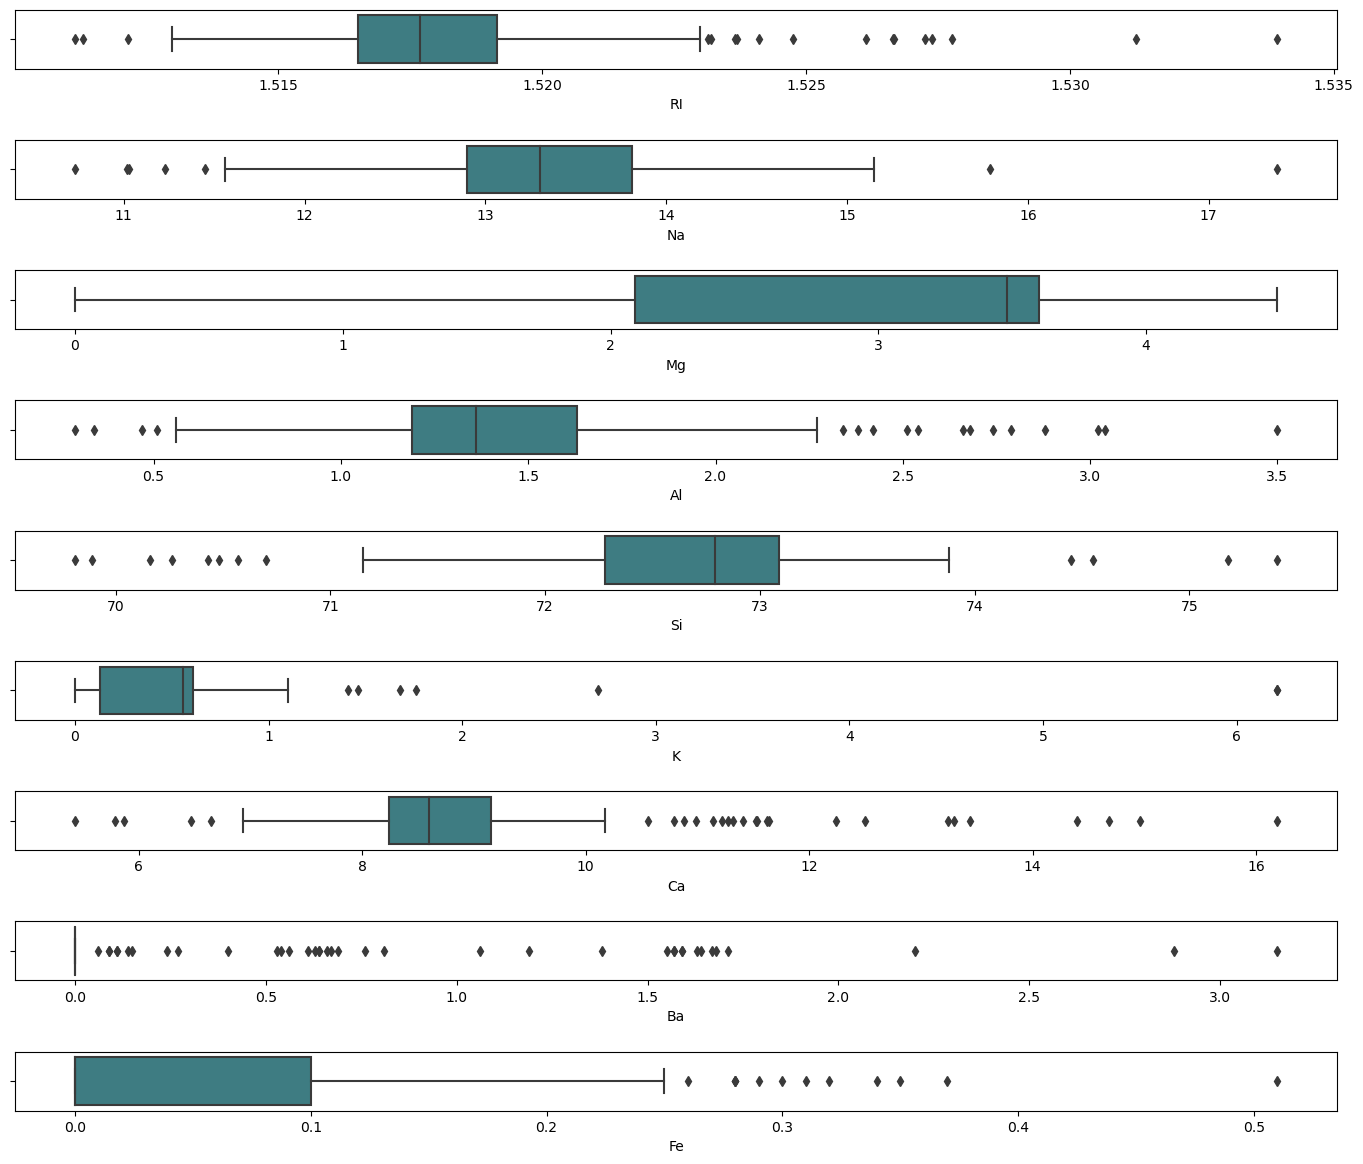

In [13]:
## checking for the outliers 
ot=glass.copy() 
fig, axes=plt.subplots(9,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='RI',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Na',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Mg',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Al',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Si',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='K',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Ca',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Ba',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Fe',data=ot,palette='crest',ax=axes[8])
plt.tight_layout(pad=2.0)

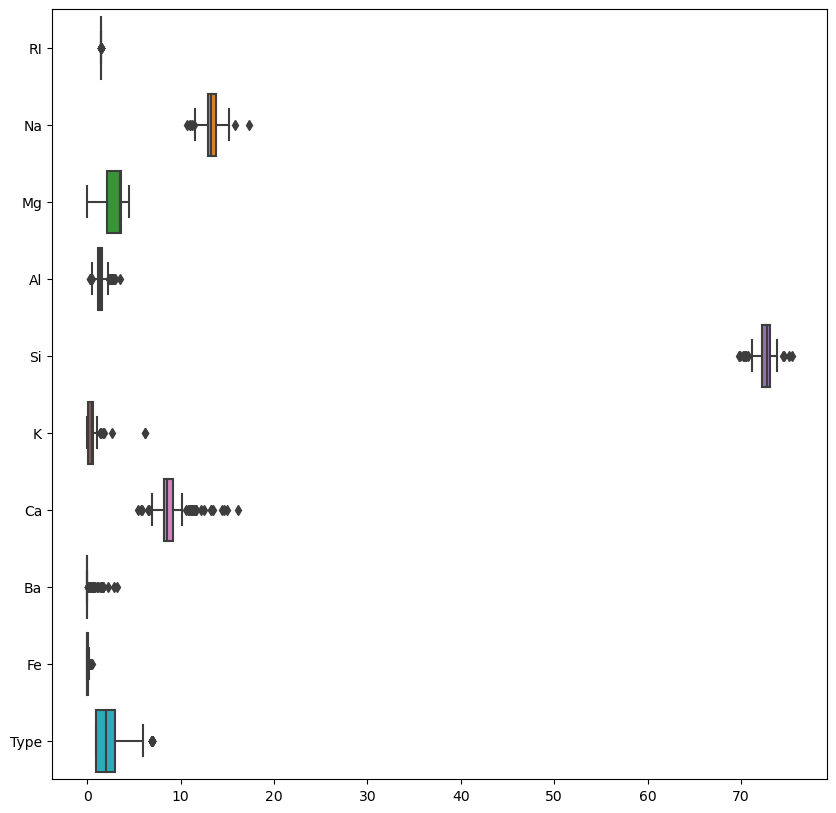

In [14]:
#outlier
plt.figure(figsize=(10,10))
sns.boxplot(data=glass, orient="h");

<Figure size 800x800 with 0 Axes>

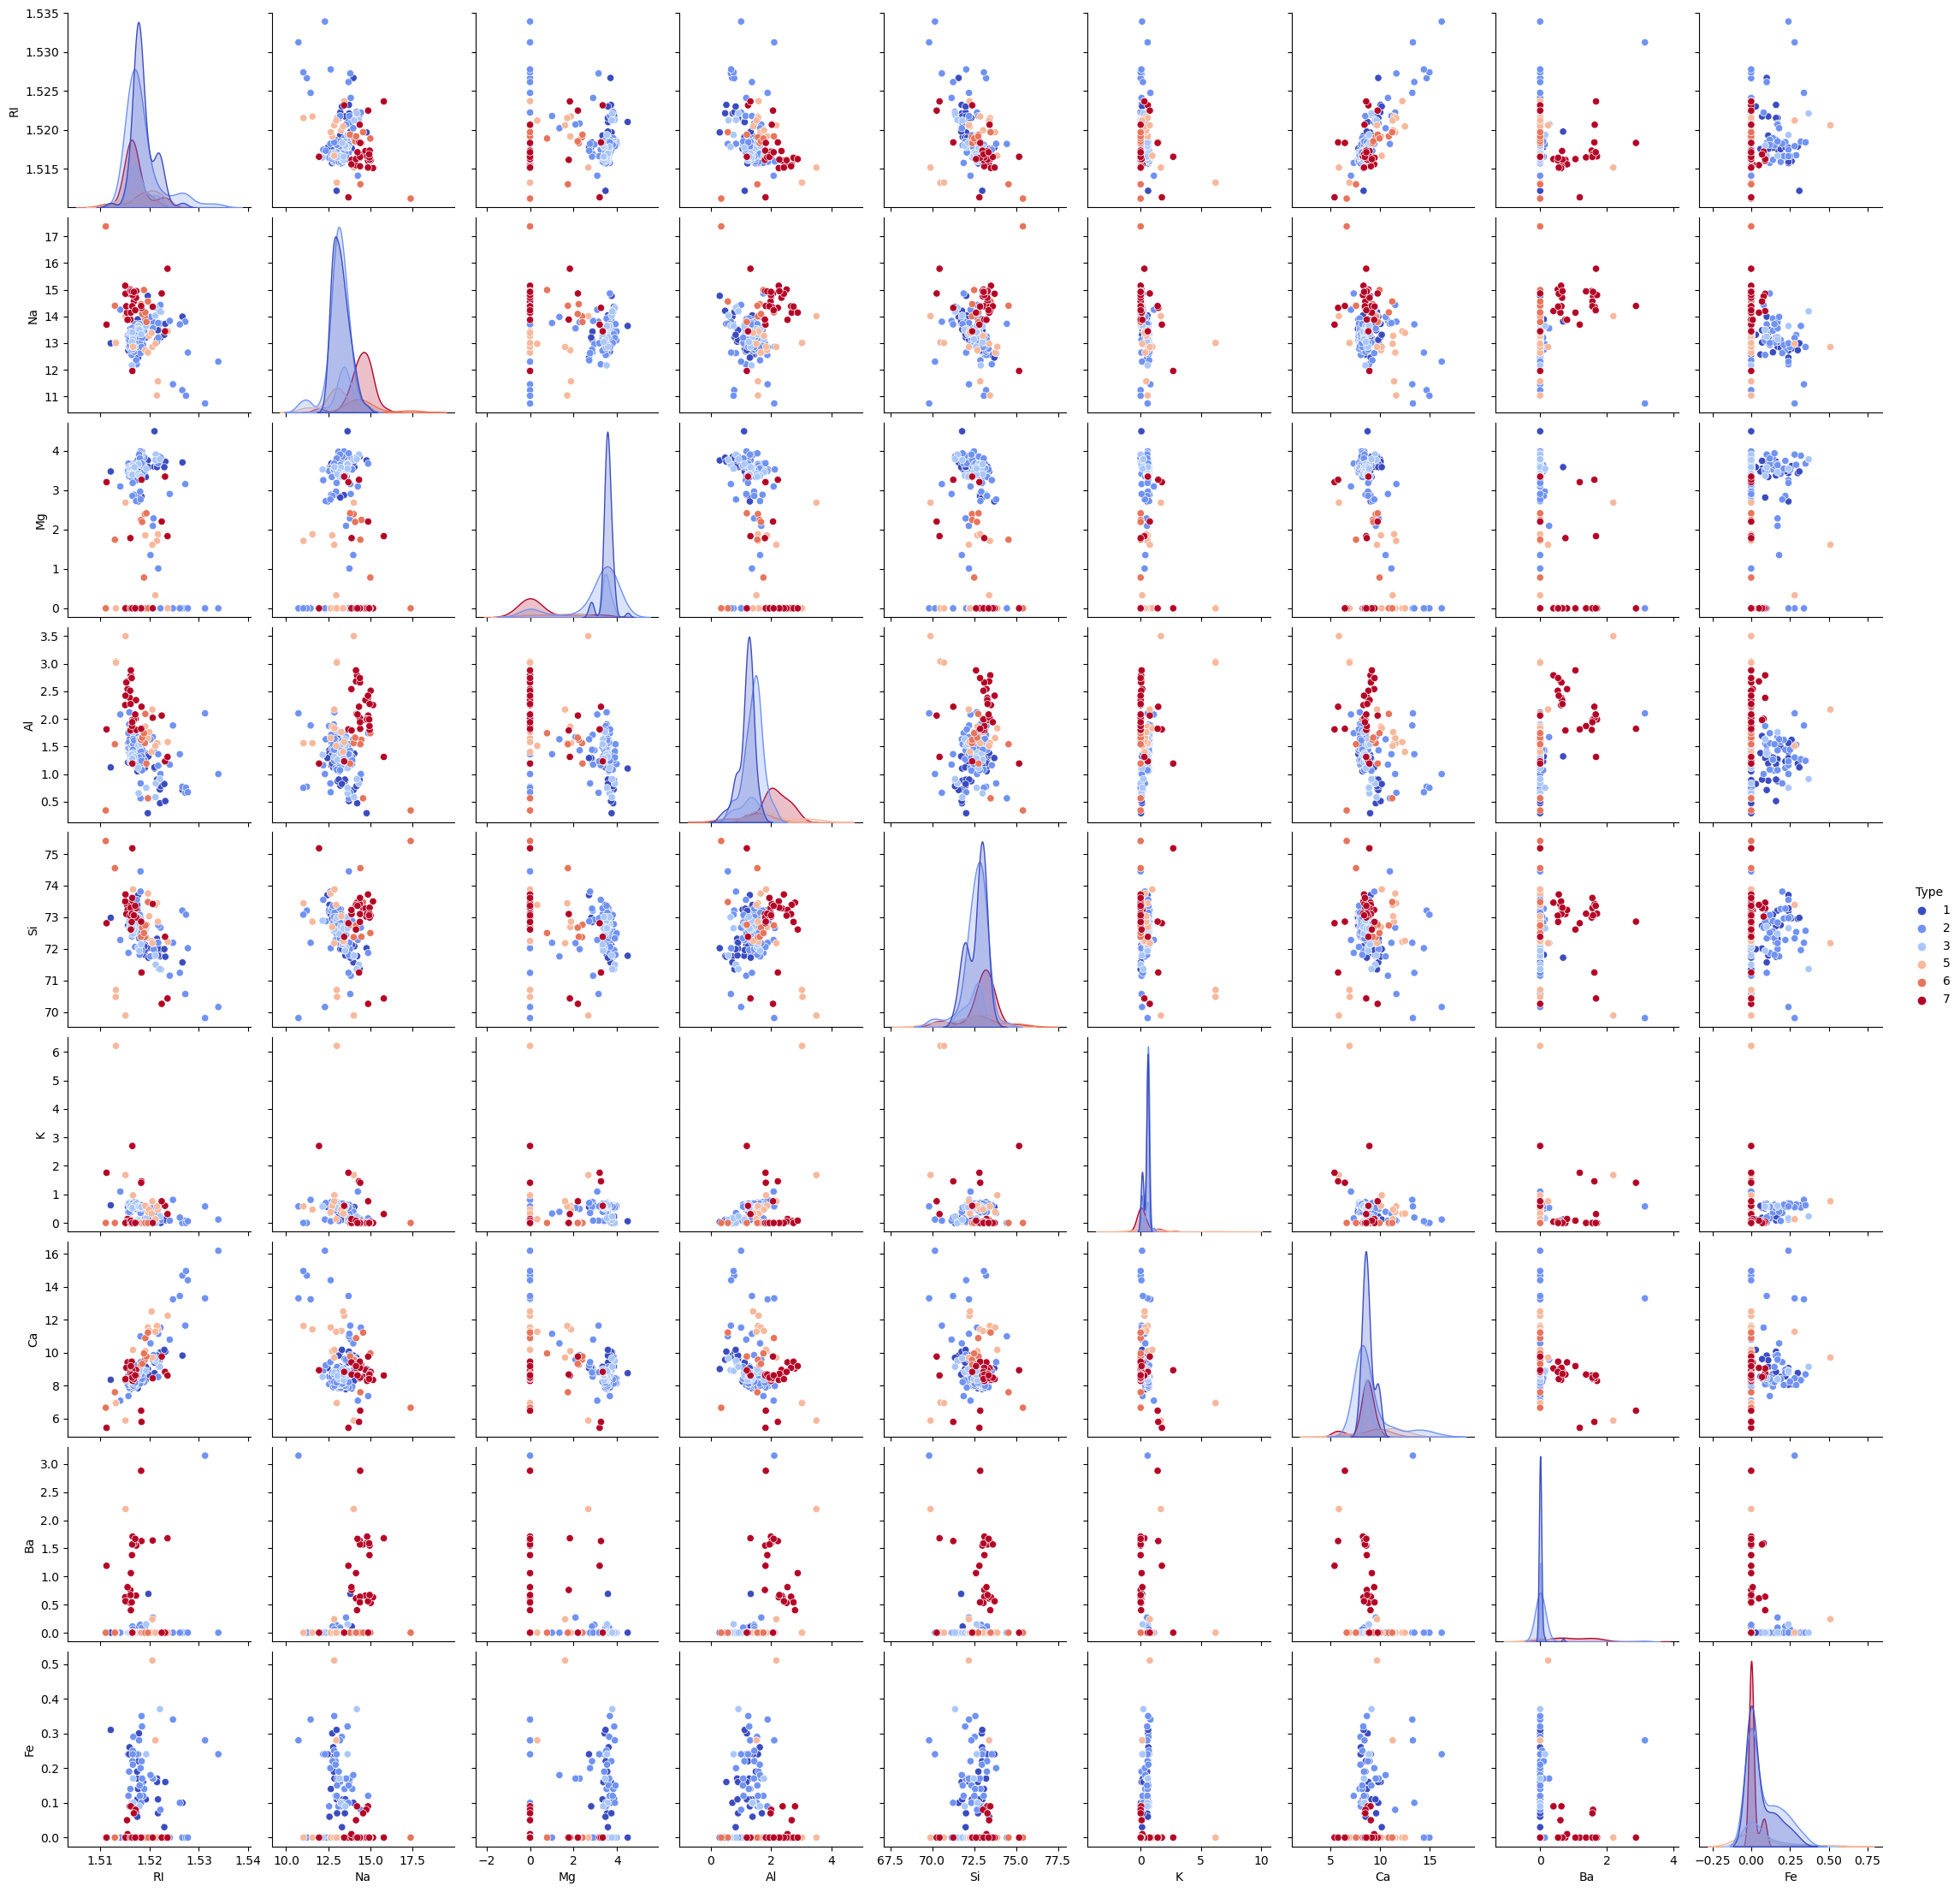

In [15]:
plt.figure(figsize=(8,8))
sns.pairplot(glass,hue ='Type', palette='coolwarm')
plt.show()

<AxesSubplot:>

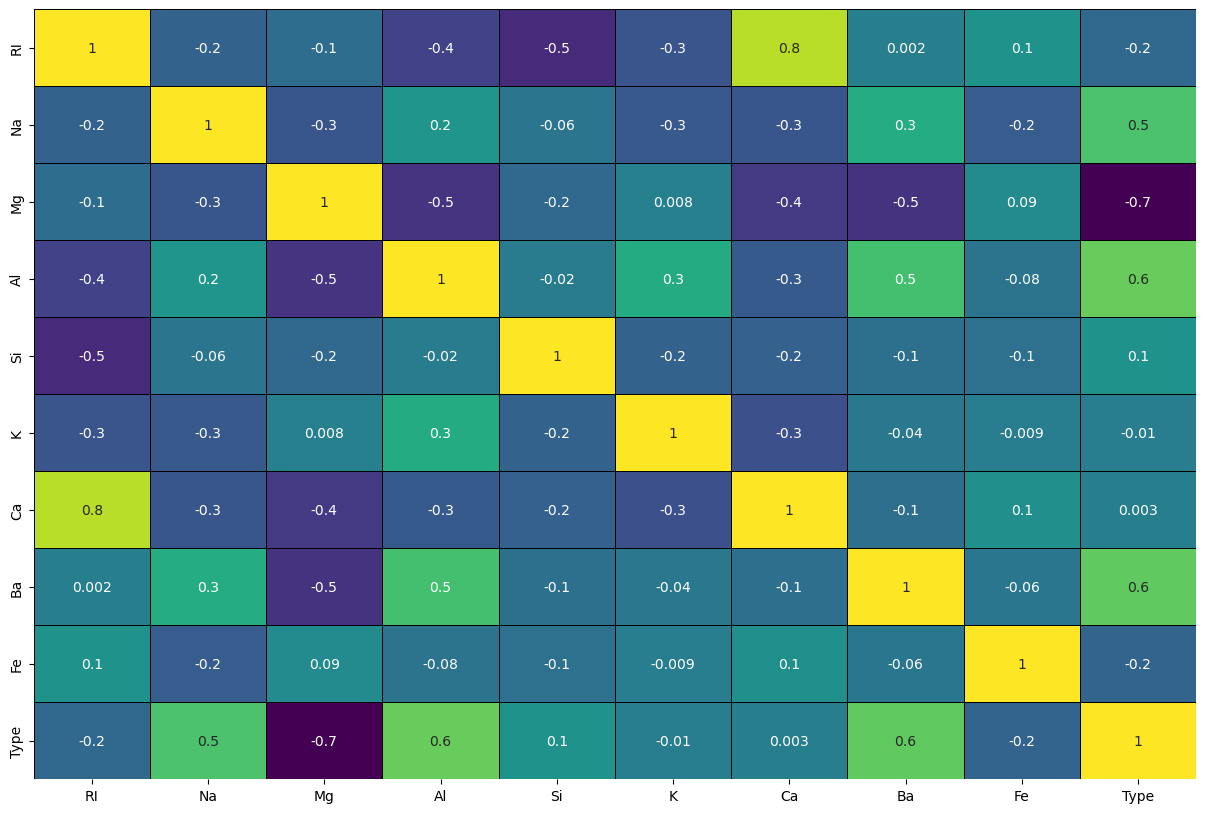

In [17]:
 #Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(glass.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

Text(0.5, 1.0, 'Histogram of Classes')

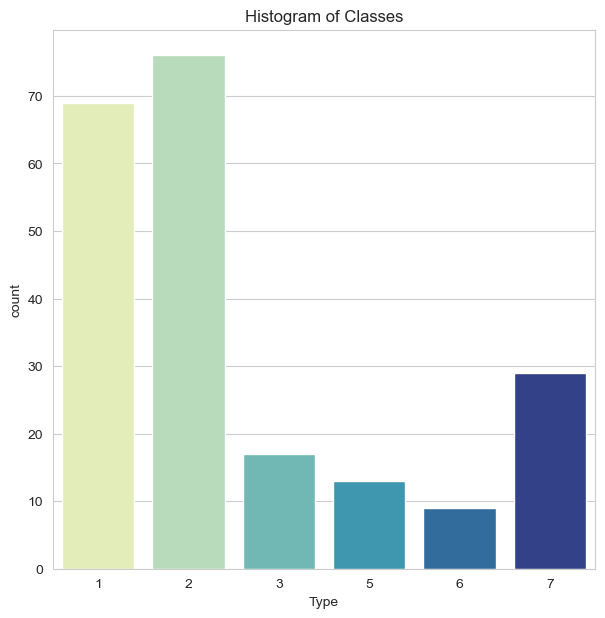

In [18]:
# Set default plot grid
sns.set_style('whitegrid')
# Plot histogram of classes
plt.rcParams['figure.figsize'] = (7,7)
sns.countplot(glass['Type'], palette='YlGnBu')
ax = plt.gca()
ax.set_title("Histogram of Classes")

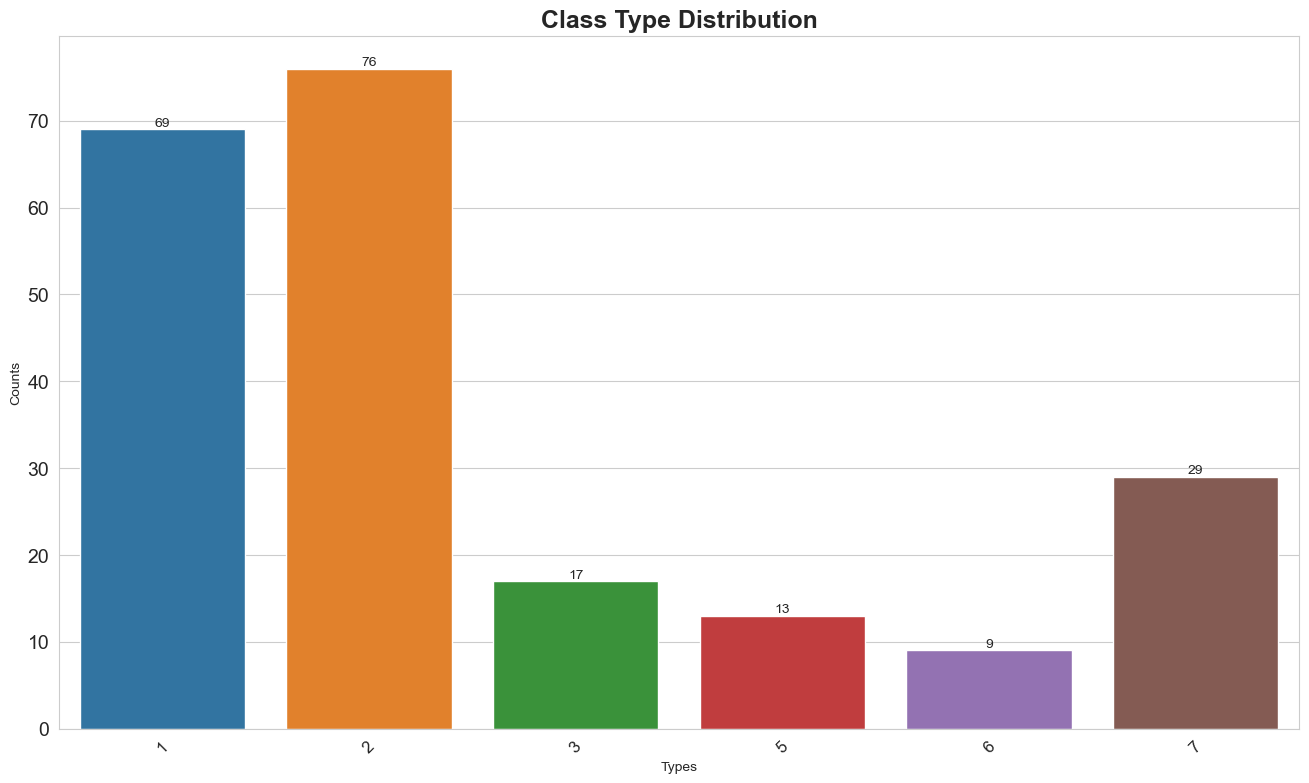

In [19]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = glass['Type'].value_counts().index.tolist(), y = glass['Type'].value_counts().tolist())
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Class Type Distribution",  fontsize = 18, fontweight = 'bold')
plt.xlabel('Types')
plt.ylabel('Counts')
for i in ax.containers:
    ax.bar_label(i,)

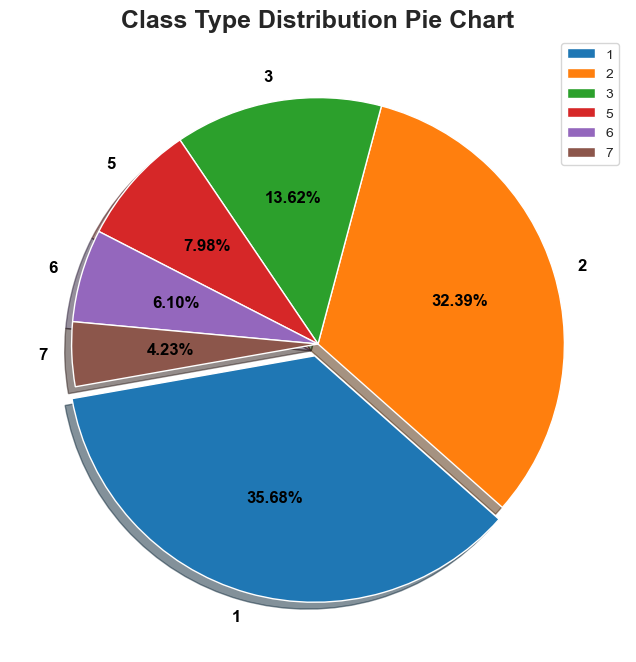

In [20]:
plt.figure(figsize = (12,8))
plt.pie(glass['Type'].value_counts(),
       labels=glass.Type.unique(),
       explode = [0.05,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

In [21]:
#seperating the input and output variables
x=glass.iloc[:,:-1].values
x

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [22]:
y=glass.iloc[:,-1].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], dtype=int64)

Since, the data is imblance we are going to perform over sampling.

In [23]:
#oversampling
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
xo,yo=oversample.fit_resample(x,y)

In [24]:
#checking the oversampling output
y1=pd.DataFrame(yo)
y1.value_counts()

1    76
2    76
3    76
5    76
6    76
7    76
dtype: int64

<AxesSubplot:title={'center':'after oversampling'}, ylabel='count'>

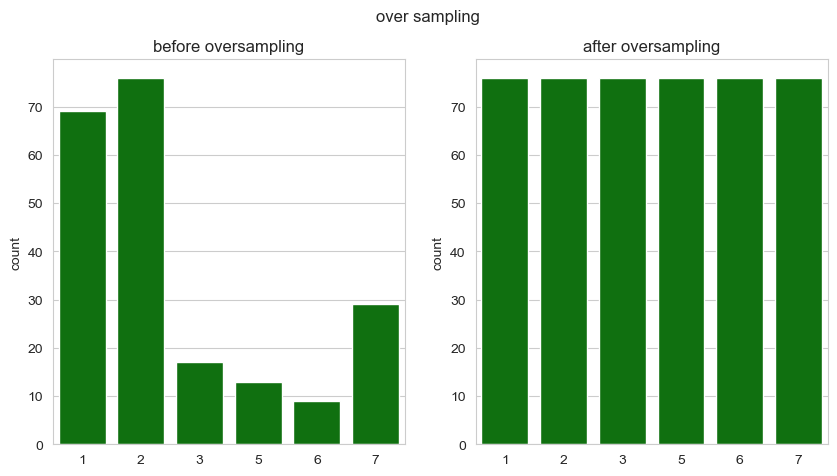

In [25]:
#countplot before and after

figure, axes = plt.subplots(1, 2, sharex=True,figsize=(10, 5))
figure.suptitle('over sampling')
axes[0].set_title('before oversampling')
axes[1].set_title('after oversampling')
sns.countplot(x = y, color = 'green',ax=axes[0])
sns.countplot(x = yo, color = 'green',ax=axes[1])

In [26]:
#splitting test and train data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(xo,yo,test_size=0.30,
                                                 random_state=1)

In [27]:
#checking the size of test and train data
print('x_train: ',x_train.shape)
print('y_train: ',y_train.shape)
print('x_test: ',x_test.shape)
print('y_test: ',y_test.shape)

x_train:  (319, 9)
y_train:  (319,)
x_test:  (137, 9)
y_test:  (137,)


In [28]:
#normalization using standard scalar
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [29]:
#KNN model creation
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
#predicting the output from the test values
y_pred= model.predict(x_test)
y_pred

array([1, 3, 5, 3, 3, 6, 6, 7, 7, 2, 5, 6, 5, 7, 1, 5, 1, 5, 1, 6, 3, 7,
       5, 1, 3, 7, 1, 3, 7, 1, 2, 1, 6, 3, 5, 7, 3, 5, 1, 3, 1, 3, 5, 3,
       6, 5, 2, 2, 6, 1, 5, 7, 3, 7, 7, 6, 7, 3, 5, 5, 2, 3, 5, 6, 3, 6,
       5, 6, 3, 5, 6, 5, 1, 6, 7, 5, 7, 7, 6, 7, 1, 3, 6, 2, 2, 5, 7, 1,
       6, 1, 1, 3, 6, 5, 5, 3, 1, 5, 2, 1, 3, 3, 2, 6, 3, 7, 3, 7, 3, 2,
       5, 7, 5, 5, 3, 1, 2, 7, 7, 5, 2, 5, 6, 5, 7, 1, 6, 6, 1, 2, 1, 1,
       1, 3, 1, 7, 5], dtype=int64)

In [31]:
#importing evaluation metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
matrix=confusion_matrix(y_test,y_pred)
matrix

array([[19,  0,  3,  0,  0,  0],
       [ 3, 12,  2,  0,  1,  0],
       [ 1,  0, 21,  0,  0,  0],
       [ 0,  1,  0, 29,  0,  0],
       [ 0,  0,  0,  0, 18,  0],
       [ 2,  0,  0,  0,  2, 23]], dtype=int64)

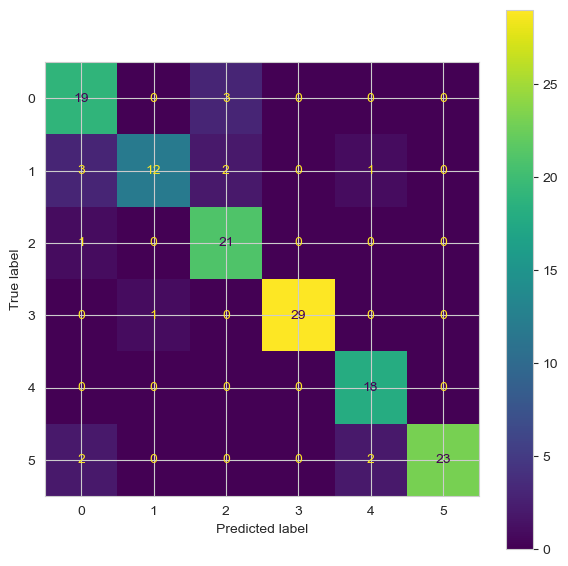

In [32]:
#displaying the confusion matrix
cmd=ConfusionMatrixDisplay(matrix)
cmd.plot()

In [33]:
score=accuracy_score(y_test,y_pred)
print('the accuracy of this model is: ',score)

the accuracy of this model is:  0.8905109489051095


In [34]:
report= classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.76      0.86      0.81        22
           2       0.92      0.67      0.77        18
           3       0.81      0.95      0.88        22
           5       1.00      0.97      0.98        30
           6       0.86      1.00      0.92        18
           7       1.00      0.85      0.92        27

    accuracy                           0.89       137
   macro avg       0.89      0.88      0.88       137
weighted avg       0.90      0.89      0.89       137



## Conclusion:

#### The overall accuracy of the model is reported as 0.91, which means that the model has correctly classified 91% on this dataset. It has performed reasonably well in classifying it into different categories based on their features.